Data set taken from google advanced data analytics course

Problem Statement:
    The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion.
    
Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable

In [207]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [208]:
import warnings
warnings.filterwarnings("ignore")

In [209]:
df=pd.read_csv('tiktok_dataset.csv')

In [210]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [211]:
df=df.iloc[:,1:]

In [212]:
df.shape

(19382, 11)

Handling Missing Data

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


In [214]:
df.isna().sum()

claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [215]:
df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [216]:
df.describe(include='object')

,claim_status,video_transcription_text,verified_status,author_ban_status
count,19084,19084,19382,19382
unique,2,19012,2,3
top,claim,a friend read in the media a claim that badmi...,not verified,active
freq,9608,2,18142,15663


In [217]:
df.dropna(inplace=True)

In [218]:
df.duplicated().sum()

0

Handling Outliers

In [219]:
def boxplot_display(column):
    sns.boxplot(df[column])

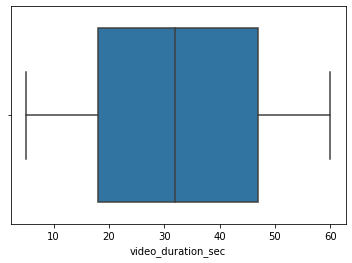

In [220]:
boxplot_display('video_duration_sec')

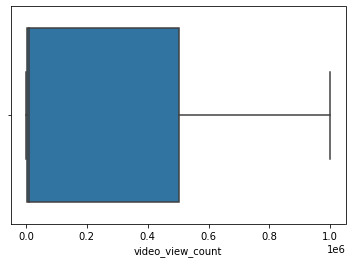

In [221]:
boxplot_display('video_view_count')

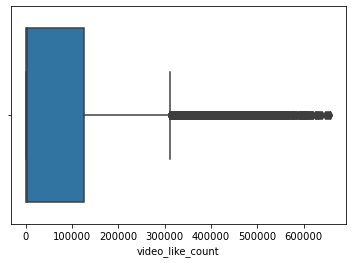

In [222]:
boxplot_display('video_like_count')

In [223]:
def upper_lim(column):
    lower_limit=df[column].quantile(0.25)
    upper_limit=df[column].quantile(0.75)
    IQR=upper_limit-lower_limit
    df.loc[df[column]>(upper_limit+IQR*1.5),column]=upper_limit

In [224]:
upper_lim('video_like_count')

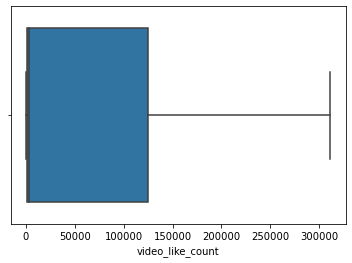

In [225]:
boxplot_display('video_like_count')

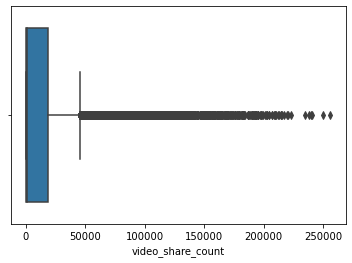

In [226]:
boxplot_display('video_share_count')

In [227]:
upper_lim('video_share_count')

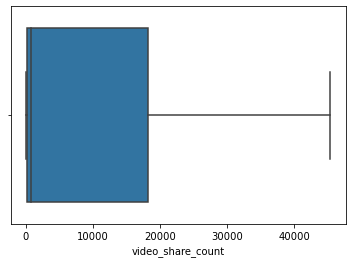

In [228]:
boxplot_display('video_share_count')

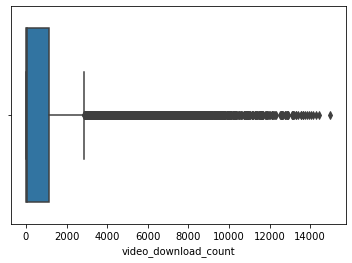

In [229]:
boxplot_display('video_download_count')

In [230]:
upper_lim('video_download_count')

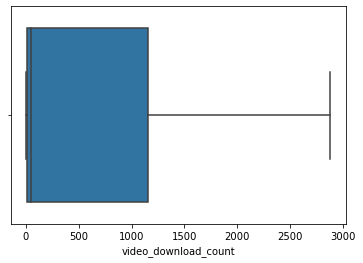

In [231]:
boxplot_display('video_download_count')

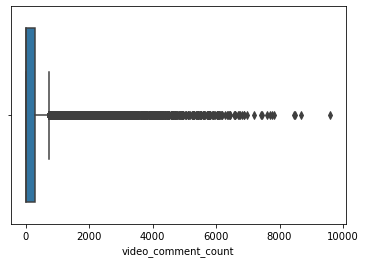

In [232]:
boxplot_display('video_comment_count')

In [233]:
upper_lim('video_comment_count')

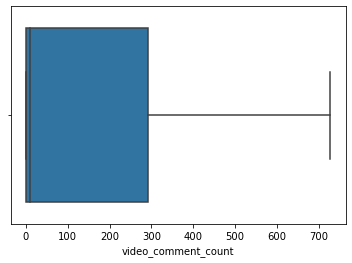

In [234]:
boxplot_display('video_comment_count')

the number of unverified videos are contributing to most of the dataset inorder to avoid any discrepancy in the data representation of verified video using resample

In [235]:
df["verified_status"].value_counts()

not verified    17884
verified         1200
Name: verified_status, dtype: int64

In [236]:
# Check class balance
df["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

In [237]:
verified_rows=df[df.verified_status=='verified']#minority

In [238]:
not_verified_rows=df[df.verified_status=='not verified']#majority

In [239]:
verified_rows=resample(verified_rows,
                  replace=True,# to sample with replacement
                  n_samples=len(not_verified_rows), # to match majority class
                  random_state=0)# to create reproducible results


In [240]:
df1=pd.concat([not_verified_rows,verified_rows])

In [241]:
df1.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [242]:
df1.verified_status.value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [243]:
df1.corr()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_id,1.000000,0.011859,0.002554,0.001095,-0.009699,0.010858,0.009095
video_duration_sec,0.011859,1.000000,0.013589,0.006033,0.000476,0.004584,-0.002217
video_view_count,0.002554,0.013589,1.000000,0.799195,0.741266,0.739726,0.709886
video_like_count,0.001095,0.006033,0.799195,1.000000,0.800200,0.783464,0.734033
video_share_count,-0.009699,0.000476,0.741266,0.800200,1.000000,0.743740,0.699667
video_download_count,0.010858,0.004584,0.739726,0.783464,0.743740,1.000000,0.805979
video_comment_count,0.009095,-0.002217,0.709886,0.734033,0.699667,0.805979,1.000000


One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude video_like_count. And among the variables that quantify video metrics, you could keep video_view_count, video_share_count, video_download_count, and video_comment_count as features.

Logistic Regression

In [244]:
X=df1[['video_duration_sec','video_view_count','video_share_count','video_comment_count','author_ban_status','claim_status']]
Y=df1[['verified_status']]

In [245]:
X=pd.get_dummies(X,drop_first=True)
Y=pd.get_dummies(Y,drop_first=True)
X=StandardScaler().fit(X).transform(X)
Y=StandardScaler().fit(Y).transform(Y)


In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [247]:
clf=LogisticRegression()

In [248]:
clf.fit(X_train,y_train)

LogisticRegression()

In [249]:
clf.coef_

array([[-0.02765629, -0.05393152,  0.08912087,  0.07062886, -0.08271968,
        -0.02924339,  0.84220927]])

In [250]:
clf.intercept_

array([-0.03041724])

In [251]:
y_predict=clf.predict(X_test)

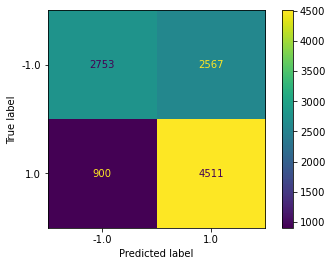

In [252]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict,labels=clf.classes_),display_labels=clf.classes_).plot()
plt.show()


The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [253]:
#precision true positive/(true positives+false positives) predicts
#recall true positive/(true positives+true negatives) identifies


In [254]:
target_labels = ["verified", "not verified"]

print(classification_report(y_test, y_predict, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.52      0.61      5320
not verified       0.64      0.83      0.72      5411

    accuracy                           0.68     10731
   macro avg       0.70      0.68      0.67     10731
weighted avg       0.69      0.68      0.67     10731



The classification report above shows that the logistic regression model achieved a precision of 64% and a recall of 83%, and it achieved an accuracy of 70%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

The logistic regression model had not great, but acceptable predictive power: a precision of 64% is less than ideal, but a recall of 83% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.